# Linear Regression

<center>
  <img src="https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-30-at-8.18.35-AM.png"><br>
  image from: <a href="https://vitalflux.com/linear-regression-hypothesis-testing-examples/">Linear regression hypothesis testing: Concepts, Examples</a>
</center>

- by [<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" height="32"/> scikit-learn (LinearRegression)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

- Linear Regression เป็นเทคนิคพื้นฐานสำหรับการพยากรณ์ค่าตัวเลขโดยใช้ความสัมพันธ์ระหว่างตัวแปร โดยการหาเส้นตรงที่เหมาะสมในการแสดงแนวโน้มของข้อมูล

- `Y = coefficients * X + intercept`

# Understanding Linear Regression

เป็นเทคนิคพื้นฐานสำหรับการพยากรณ์ค่าตัวเลขโดยใช้ความสัมพันธ์ระหว่างตัวแปร โดยการหาเส้นตรงที่เหมาะสมในการแสดงแนวโน้มของข้อมูล


## Simple Linear Regression

Simple linear regression มุ่งเน้นไปที่ตัวแปรอิสระแบบเดียวและตัวแปรตามแบบเดียว สูตรสำหรับเส้นถดถอยคือ:

y = mx + b

โดยที่ m คือความลาดชันและ b คือจุดตัดของเส้น

## Multiple Linear Regression

Multiple linear regression ขยายความความคิดไปยังตัวแปรอิสระมากกว่าหนึ่งตัว สูตรกลายเป็น:

y = b0 + b1*x1 + b2*x2 + ... + bn*xn

โดยที่ b0 คือจุดตัดและ bi คือค่าสัมประสิทธิ์ที่ i

# สร้าง DataFrame

- เรียกใช้ `pandas`

In [1]:
import pandas as pd

- อ่านไฟล์ `california_housing_train.csv` จาก sample_data โดยคลิ๊กขวาที่ชื่อไฟล์ แล้วเลือก `Copy path`

In [2]:
data_train = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


- สำรวจ `data_train`

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
data_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


- เรียกใช้เครื่องมือเพื่อช่วยสร้างกราฟ

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

- สร้างกราฟเพื่อดูรูปแบบการกระจายและลักษณะความสัมพันธ์ของข้อมูล

In [9]:
sns.pairplot(data_train)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

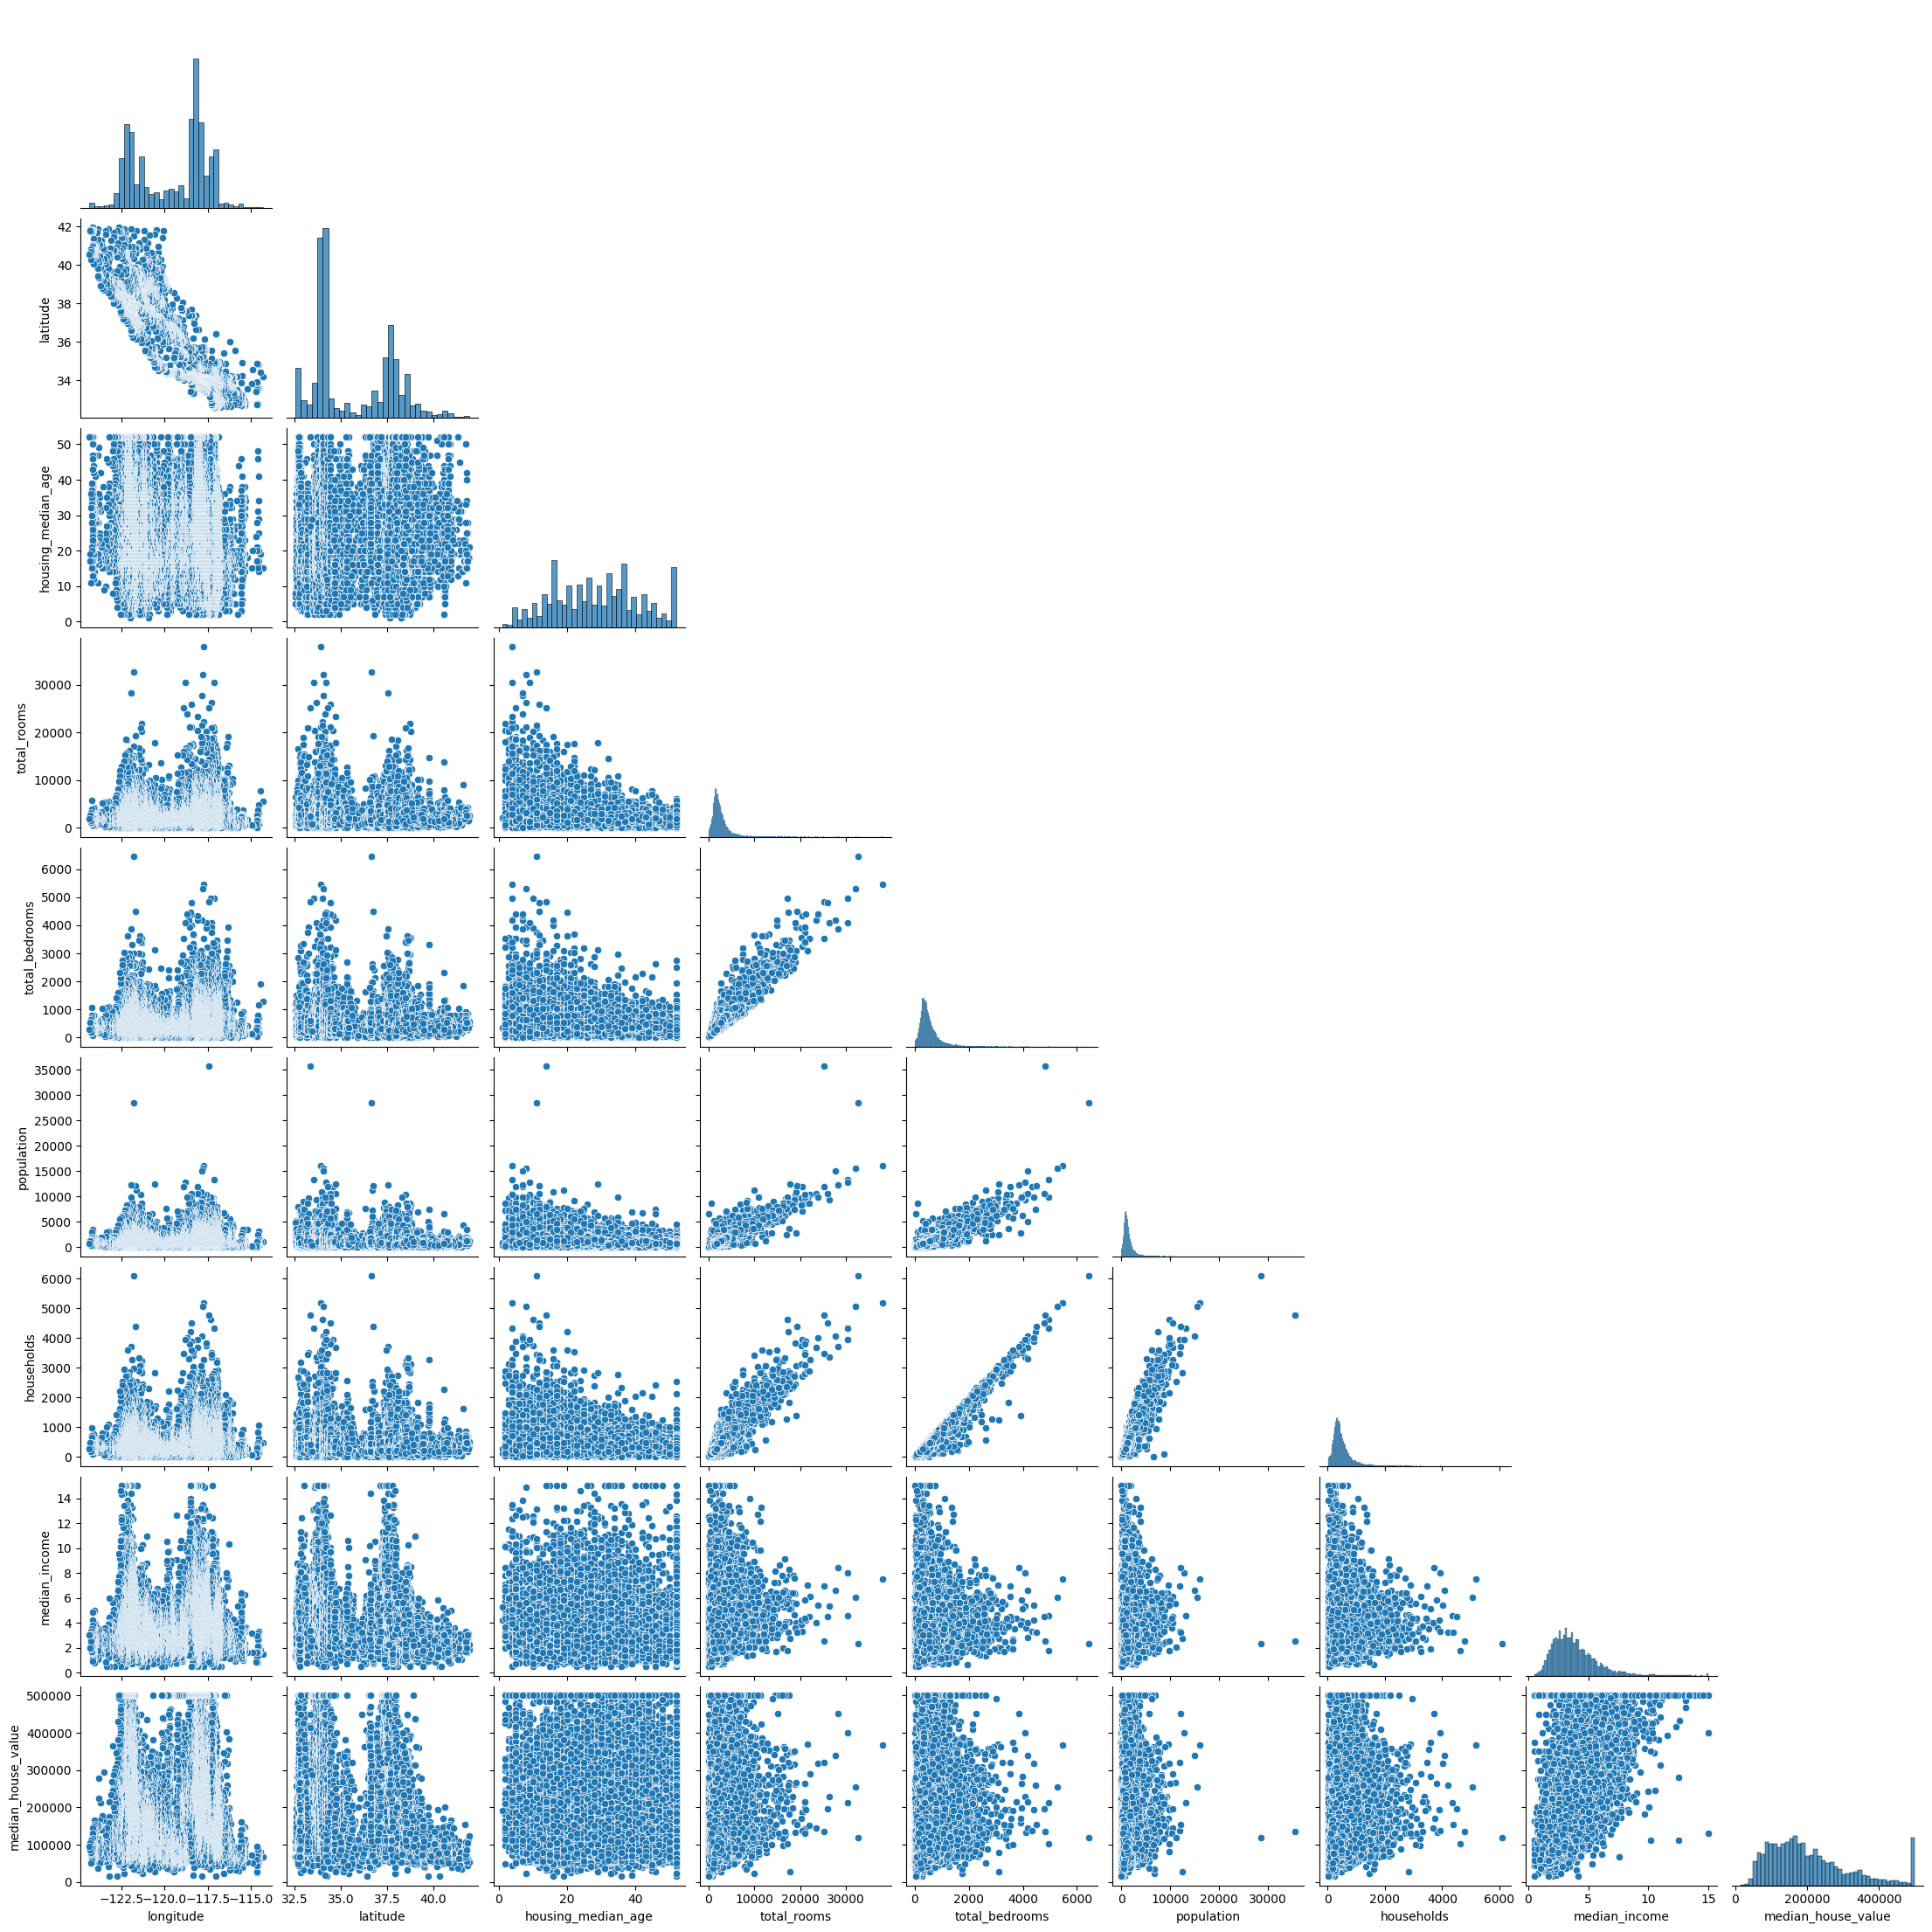

In [10]:
sns.pairplot(data_train, corner=True)
plt.show()

# สร้าง Linear Regression

- เรียกใช้ `LinearRegression` library

In [11]:
from sklearn.linear_model import LinearRegression

- ในที่นี้ต้องการทำนาย `median_house_value`

In [12]:
y_train = data_train['median_house_value']
X_train = data_train.drop('median_house_value', axis=1)

In [13]:
y_train

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [14]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


- สร้างโมเดล Linear Regression

In [15]:
model_lr = LinearRegression()

- เริ่มการเรียนรู้

In [16]:
model_lr.fit(X_train, y_train)

LinearRegression()

- ดูผลลัพธ์ ค่า coefficients

In [17]:
model_lr.coef_

array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])

In [18]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

- ดูค่า intercept

In [19]:
model_lr.intercept_

-3620600.8929739078

# Predictions

ใช้ model ในการทำนายผล

- อ่านไฟล์ `california_housing_test.csv` จาก sample_data เพื่อใช้ในการทดสอบ โดยคลิ๊กขวาที่ชื่อไฟล์ แล้วเลือก `Copy path`

In [20]:
data_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


- ในที่นี้ต้องการทำนาย `median_house_value`

In [21]:
y_test = data_test['median_house_value']
X_test = data_test.drop('median_house_value', axis=1)

- ทำนายผลจากชุดข้อมูล

In [22]:
predictions = model_lr.predict(X_test)
predictions

array([352812.31112454, 212717.70074518, 272344.69951888, ...,
        88220.58643733, 146374.67481457, 456779.61107787])

In [23]:
data_test.shape

(3000, 9)

- ลองดูเป็นกราฟเปรียบเทียบ

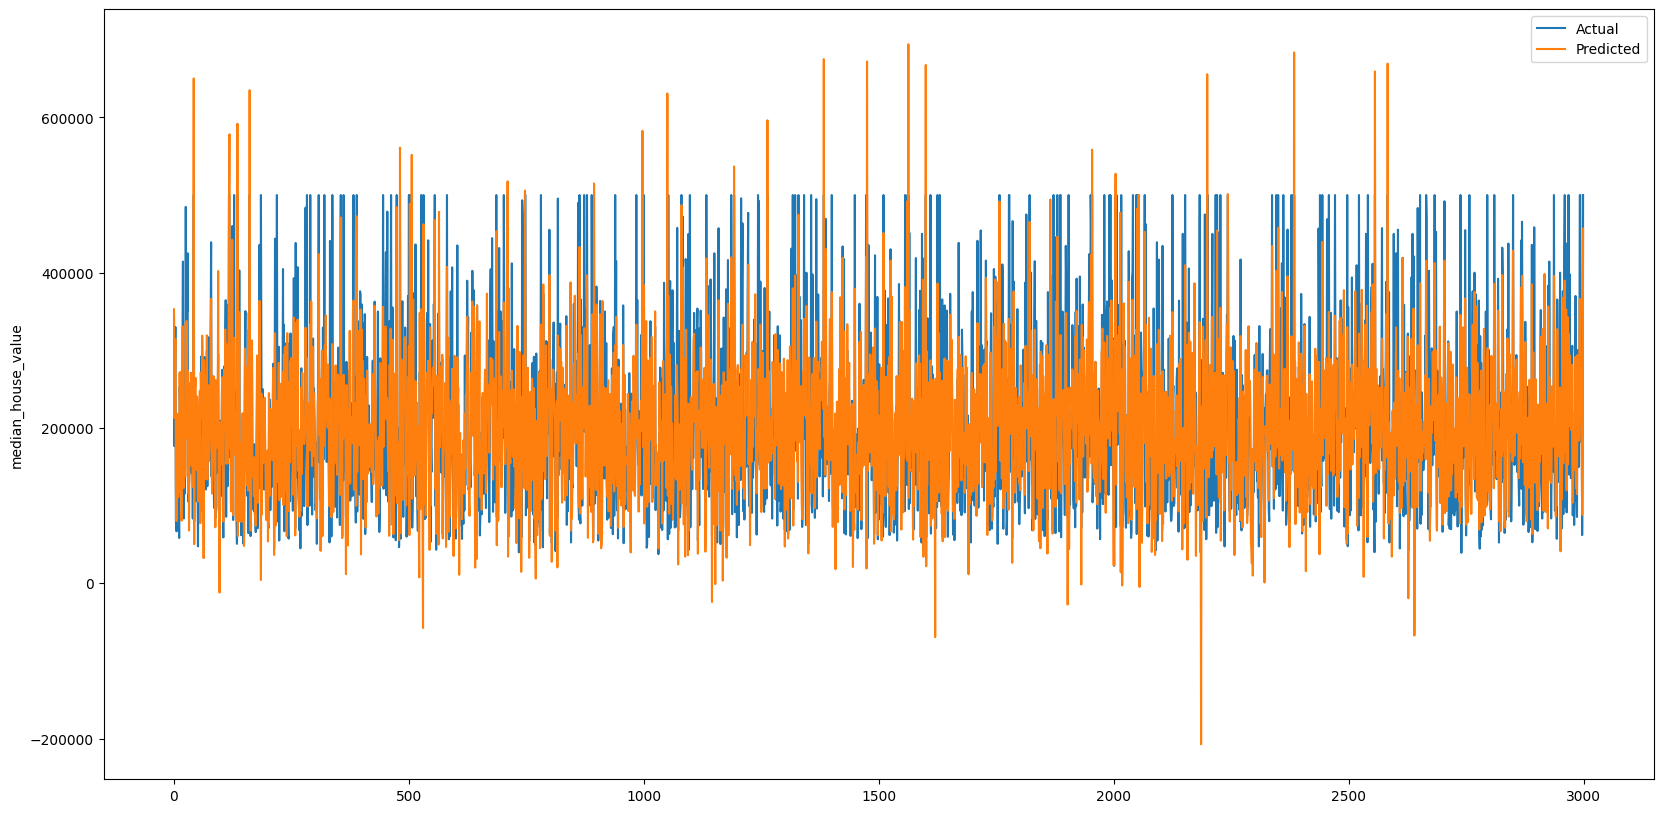

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(data=y_test, label='Actual')
sns.lineplot(data=predictions, label='Predicted')
plt.show()

# Evaluating Model Performance

## R-squared (Coefficient of Determination)

R-squared หรือค่าหมายความสัมพันธ์ เป็นตัวชี้วัดทางสถิติที่ให้ข้อมูลเกี่ยวกับความเหมาะสมของโมเดลถดถอย มันแสดงถึงสัดส่วนของความแปรปรวนในตัวแปรตามที่สามารถทำนายได้จากตัวแปรอิสระ กล่าวอีกนัยหนึ่ง R-squared แสดงให้เห็นความสามารถของตัวแปรอิสระในการอธิบายการแปรปรวนในตัวแปรตาม


## Formula

The formula for calculating R-squared is:

```
R-squared = 1 - (SSR / SST)
```

Where:
- SSR (Sum of Squared Residuals)

  ```
  SSR = Σ(yᵢ - ŷᵢ)²
  ```
  - yᵢ คือค่าตัวแปรตามที่สังเกตได้สำหรับจุดข้อมูลที่ i
  - ŷᵢ คือค่าที่ทำนายได้สำหรับตัวแปรตามสำหรับจุดข้อมูลที่ i โดยใช้โมเดลถดถอย

  SSR แสดงถึงความแปรปรวนที่ไม่สามารถอธิบายได้ด้วยเส้นถดถอย

- SST (Total Sum of Squares)

  ```
  SST = Σ(yᵢ - ȳ)²
  ```

  - yᵢ คือค่าตัวแปรตามที่สังเกตได้สำหรับจุดข้อมูลที่ i
  - ȳ คือค่าเฉลี่ยของค่าตัวแปรตามที่สังเกตได้

  SST แสดงถึงการกระจายทั้งหมดของจุดข้อมูลรอบค่าเฉลี่ย โดยไม่สนใจความสัมพันธ์ใดๆ กับตัวแปรอิสระ

## Interpretation

ค่า R-squared อยู่ในช่วงระหว่าง 0 ถึง 1 ค่าที่มี R-squared ใกล้เคียง 1 จะเป็นตัวแบบที่เหมาะสมกับข้อมูลมากที่สุด นี่คือวิธีการอธิบายค่า R-squared:

- R-squared = 1: โมเดลอธิบายการแปรปรวนในตัวแปรตามอย่างสมบูรณ์
- R-squared > 0.5: โมเดลถือเป็นตัวแบบที่เหมาะสม
- R-squared < 0.5: โมเดลอาจไม่เหมาะสมและอาจไม่สามารถอธิบายความแปรปรวนได้มากนัก

## วัดค่า ***R<sup>2</sup>***

In [26]:
model_lr.score(X_test, y_test)

0.6195057678312047

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mean_absolute_error(y_test, predictions)

50352.22825794297

In [29]:
import pickle

In [30]:
pickle.dump(model_lr, open('/content/sample_data/lr.pkl', 'wb'))

In [31]:
model_lr1 = pickle.load(open('/content/sample_data/lr.pkl', 'rb'))

In [32]:
model_lr1.coef_

array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])